# Polynomial Regression

In [2]:
# Load relevant scientific libraries.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

In [3]:
# Create m=100 samples for Polynomial Regression

m = 100

X = 6 * np.random.rand(m, 1) - 3

y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

$ y = 0.5X^2 + X + 2 + \epsilon$

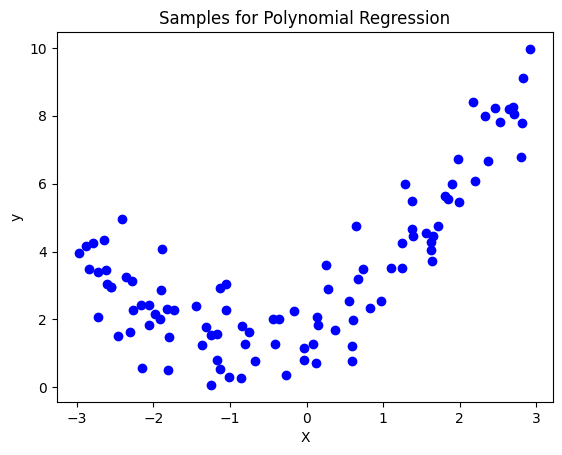

In [4]:
# Plot the data for visualization.
plt.plot(X, y, 'bo')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Samples for Polynomial Regression')

plt.show()

In [5]:
# Look at the capability of Linear Regression on only X

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)


LinearRegression()

In [6]:
# A set of samples for looking at visualization of Linear Regression

X_new = np.linspace(-2.5, 2.5, 100).reshape(100,1)
print(X_new.shape)

(100, 1)


In [7]:
y_pred_linear = linear_reg.predict(X_new)
print(y_pred_linear.shape)

(100, 1)


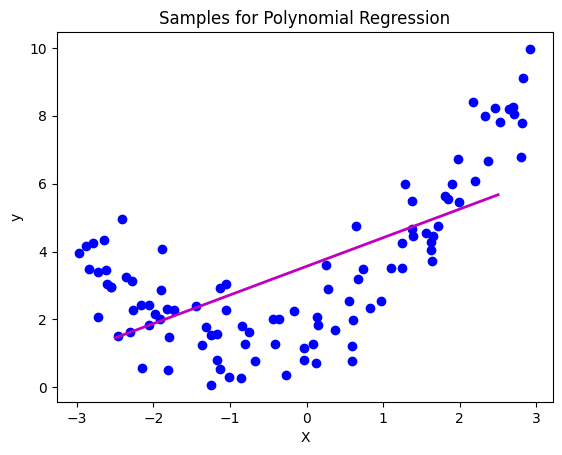

In [8]:
# Plot the data for visualization.
plt.plot(X, y, 'bo')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Samples for Polynomial Regression')

plt.plot(X_new, y_pred_linear, 'm-', linewidth = 2, label='Linear Regression')

plt.savefig('Underfitting.png', dpi=300)
plt.show()

**This scenario is referred to as `Underfitting`**
- We are trying to fit a non-linear data with linear model.
- The training and testing accuracy will be bad.

In [9]:
# With Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

PolynomialFeatures(degree=2, include_bias=False) := $X$ and $X^2$

In [10]:
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


$\hat y = \theta_0 + \theta_1X$

$\hat y = \theta_0 + \theta_1X + \theta_2X^2$

In [11]:
# Fit linear regression on polynomial features

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression()

In [12]:
# Predict using polynomial features
X_new_poly = poly_features.transform(X_new)
y_pred_poly= poly_reg.predict(X_new_poly)

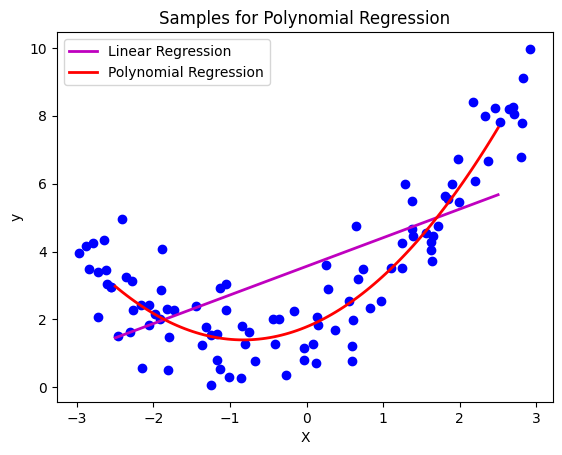

In [13]:
# Plot the data for visualization.
plt.plot(X, y, 'bo')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Samples for Polynomial Regression')

plt.plot(X_new, y_pred_linear, 'm-', linewidth=2, label='Linear Regression')
plt.plot(X_new, y_pred_poly, 'r-', linewidth=2, label='Polynomial Regression')

plt.legend()
plt.show()

### Polynomial feature combinations
- $a, b: \text{degree } 2 → a, a^2, b, b^2, ab$
- $a, b: \text{degree } 3 → a, a^2, a^3, b, b^2, b^3, ab, a^2b, ab^2$

### Number of features:
$n$ features and degree $d$ leads to $\Large{\frac{(n+d)!}{n! \times d!}}$ features

In [14]:
poly_features30 = PolynomialFeatures(degree=30, include_bias=False)

X_poly30 = poly_features30.fit_transform(X)

In [15]:
X_poly30.shape

(100, 30)

In [16]:
poly_reg30 = LinearRegression()
poly_reg30.fit(X_poly30, y)

LinearRegression()

In [17]:
X_new_poly30 = poly_features30.transform(X_new)
y_pred_poly30= poly_reg30.predict(X_new_poly30)

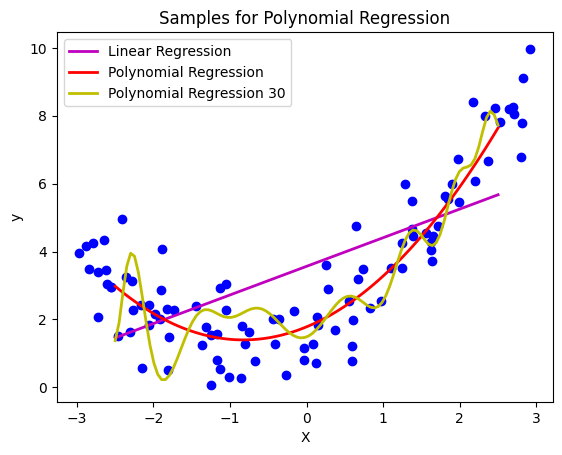

In [18]:
# Plot the data for visualization.
plt.plot(X, y, 'bo')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Samples for Polynomial Regression')

plt.plot(X_new, y_pred_linear, 'm-', linewidth=2, label='Linear Regression')
plt.plot(X_new, y_pred_poly, 'r-', linewidth=2, label='Polynomial Regression')
plt.plot(X_new, y_pred_poly30, 'y-', linewidth=2, label='Polynomial Regression 30')

plt.legend()
plt.show()

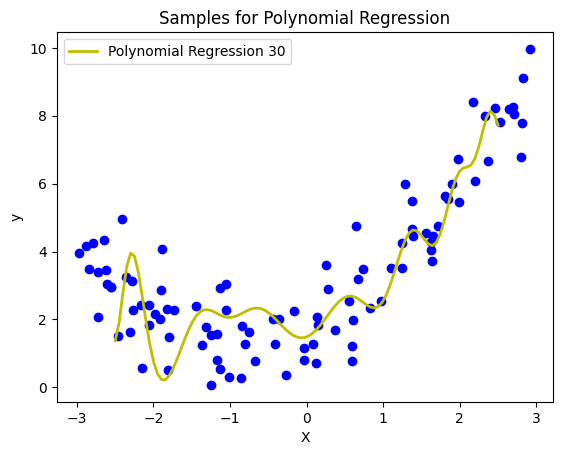

In [19]:
# Plot the data for visualization.
plt.plot(X, y, 'bo')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Samples for Polynomial Regression')

plt.plot(X_new, y_pred_poly30, 'y-', linewidth=2, label='Polynomial Regression 30')

plt.legend()
plt.show()

**This scenario is referred to as `Overfitting`**
- We are trying to fit a model which will not generalize well.
- The training accuracy is good but will not lead to good testing accuracy.

## Exercise

1. Split the above data into 80% training and 20% testing with random_state=42
2. What is the $R^2$ value obtained?
3. Report the 10-Fold Cross-Validation result on complete dataset
4. Repeat the experiment with StandardScaling.


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [21]:
# Fit a linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#Estimate R^2 score
model.score(X_test,y_test)

0.4297407758395767

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Apply Polynomial Regression

poly = PolynomialFeatures()
X_poly = poly.fit_transform(X_train)


model = LinearRegression()
model.fit(X_poly,y_train)
y_pred = model.predict(X_poly)

model.score(X_poly,y_train)


0.8497157422674118

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model, X_poly, y_train, cv=10)
print("Cross-Validation scores:", cross_val_scores)
print("Mean CV score:", cross_val_scores.mean())

Cross-Validation scores: [ 0.95010156  0.94243308  0.61984541  0.76925479  0.62742011  0.84197552
 -0.0691788   0.49183416  0.88407343  0.79275831]
Mean CV score: 0.685051757729868
